In [34]:
import json
train_coco = None
val_coco = None
test_coco = None
train_json = "/scratch1/rsawahn/data/sds/coco/annotations/instances_train.json"
val_json = "/scratch1/rsawahn/data/sds/coco/annotations/instances_val.json"
test_json = "/scratch1/rsawahn/data/sds/coco/annotations/instances_test.json"
with open(train_json, "r") as f:
    train_coco = json.load(f)

with open(val_json, "r") as f:
    val_coco = json.load(f)
    
with open(test_json, "r") as f:
    test_coco = json.load(f)
    
all_coco = [train_coco, val_coco, test_coco]
ds_names = ["train", "validate", "test"]

print(train_coco.keys(), val_coco.keys(), test_coco.keys())
print(train_coco["categories"], val_coco["categories"], test_coco["categories"])

# print all keys used in annotations as a set
all_keys = set()
for ds in all_coco:
    for ann in ds["images"]:
        all_keys.update(ann.keys())
print(all_keys)

all_img_ids = []
for ds in all_coco:
    all_img_ids.extend([img["id"] for img in ds["images"]])

print(len(all_img_ids), len(set(all_img_ids)))

print("Num samples train: ", len(train_coco["annotations"]))
print("Num saples val: ", len(val_coco["annotations"]))


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations']) dict_keys(['info', 'licenses', 'categories', 'images', 'annotations']) dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
[{'supercategory': 'ignored', 'id': 0, 'name': 'ignored'}, {'supercategory': 'person', 'id': 1, 'name': 'swimmer'}, {'supercategory': 'boat', 'id': 2, 'name': 'boat'}, {'supercategory': 'boat', 'id': 3, 'name': 'jetski'}, {'supercategory': 'object', 'id': 4, 'name': 'life_saving_appliances'}, {'supercategory': 'object', 'id': 5, 'name': 'buoy'}] [{'supercategory': 'ignored', 'id': 0, 'name': 'ignored'}, {'supercategory': 'person', 'id': 1, 'name': 'swimmer'}, {'supercategory': 'boat', 'id': 2, 'name': 'boat'}, {'supercategory': 'boat', 'id': 3, 'name': 'jetski'}, {'supercategory': 'object', 'id': 4, 'name': 'life_saving_appliances'}, {'supercategory': 'object', 'id': 5, 'name': 'buoy'}] [{'supercategory': 'ignored', 'id': 0, 'name': 'ignored'}, {'supercategory': 'person', 'id'

Average tiny size:  278.35961781973066


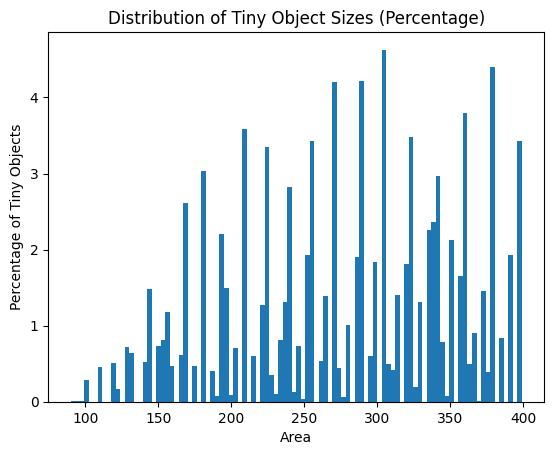

{'medium': 31542, 'large': 11111, 'small': 16050, 'tiny': 8687}
total number of annotations:  67390


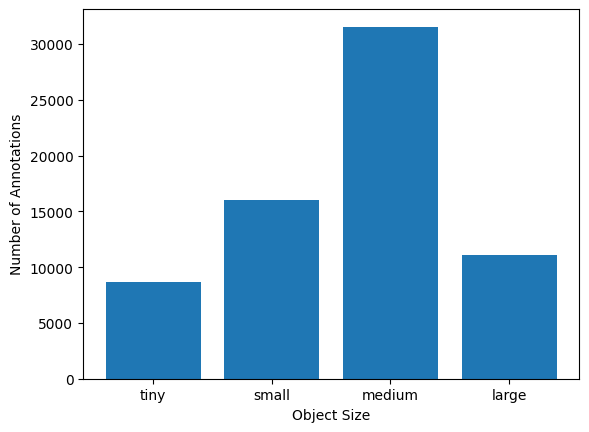

In [35]:
# general object sizes analysis
import numpy as np

def get_size_name(area):
    if area < 20*20:
        return "tiny"
    if area < 32*32:
        return "small"
    if area < 96*96:
        return "medium"
    else:
        return "large"
    
def compute_area(bbox):
    return bbox[2]*bbox[3]

tiny_sizes= []
size_counts = {}
for coco in all_coco:
    for ann in coco["annotations"]:
        size_name = get_size_name(compute_area(ann["bbox"]))
        if size_name == "tiny":
            tiny_sizes.append(compute_area(ann["bbox"]))
        if size_name not in size_counts:
            size_counts[size_name] = 0
        size_counts[size_name] += 1
        
# print("Average tiny size: ", sum(tiny_sizes)/len(tiny_sizes))
# import matplotlib.pyplot as plt
# plt.hist(tiny_sizes, bins=100)
# plt.xlabel("Area")
# plt.ylabel("Number of Tiny Objects")
# plt.title("Distribution of Tiny Object Sizes")
# plt.show()

print("Average tiny size: ", sum(tiny_sizes)/len(tiny_sizes))

# Compute the total number of tiny objects
total_tiny_objects = len(tiny_sizes)

# Compute the histogram of tiny sizes
hist, bins = np.histogram(tiny_sizes, bins=100)

# Convert counts to percentages
hist_percentage = hist / total_tiny_objects * 100

import matplotlib.pyplot as plt

plt.hist(tiny_sizes, bins=100, weights=np.ones(len(tiny_sizes)) / total_tiny_objects * 100)
plt.xlabel("Area")
plt.ylabel("Percentage of Tiny Objects")
plt.title("Distribution of Tiny Object Sizes (Percentage)")
plt.show()
        
print(size_counts)
print("total number of annotations: ", sum(size_counts.values()))
# sort the size counts from tiny small medium large
size_counts = dict(sorted(size_counts.items()))
# reverse 
size_counts = dict(reversed(list(size_counts.items())))

# create a visiualization of the distribution of object sizes
import matplotlib.pyplot as plt
import numpy as np
# add labels to x and y axis
plt.xlabel("Object Size")
plt.ylabel("Number of Annotations")
# create a bar chart
plt.bar(size_counts.keys(), size_counts.values())
# display the plot
plt.show()

{'boat': 15236, 'swimmer': 43302, 'buoy': 4949, 'jetski': 2650, 'life_saving_appliances': 1253}
total number of annotations:  67390


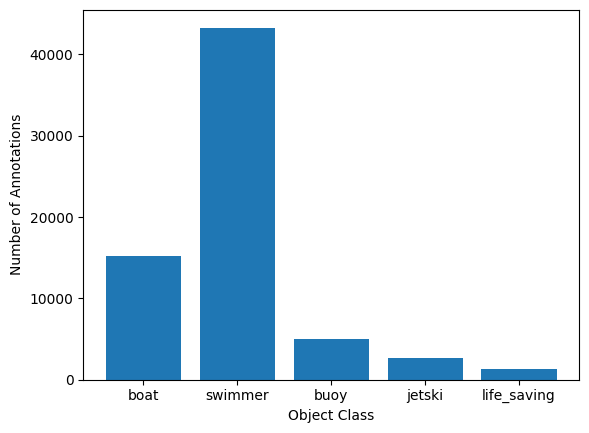

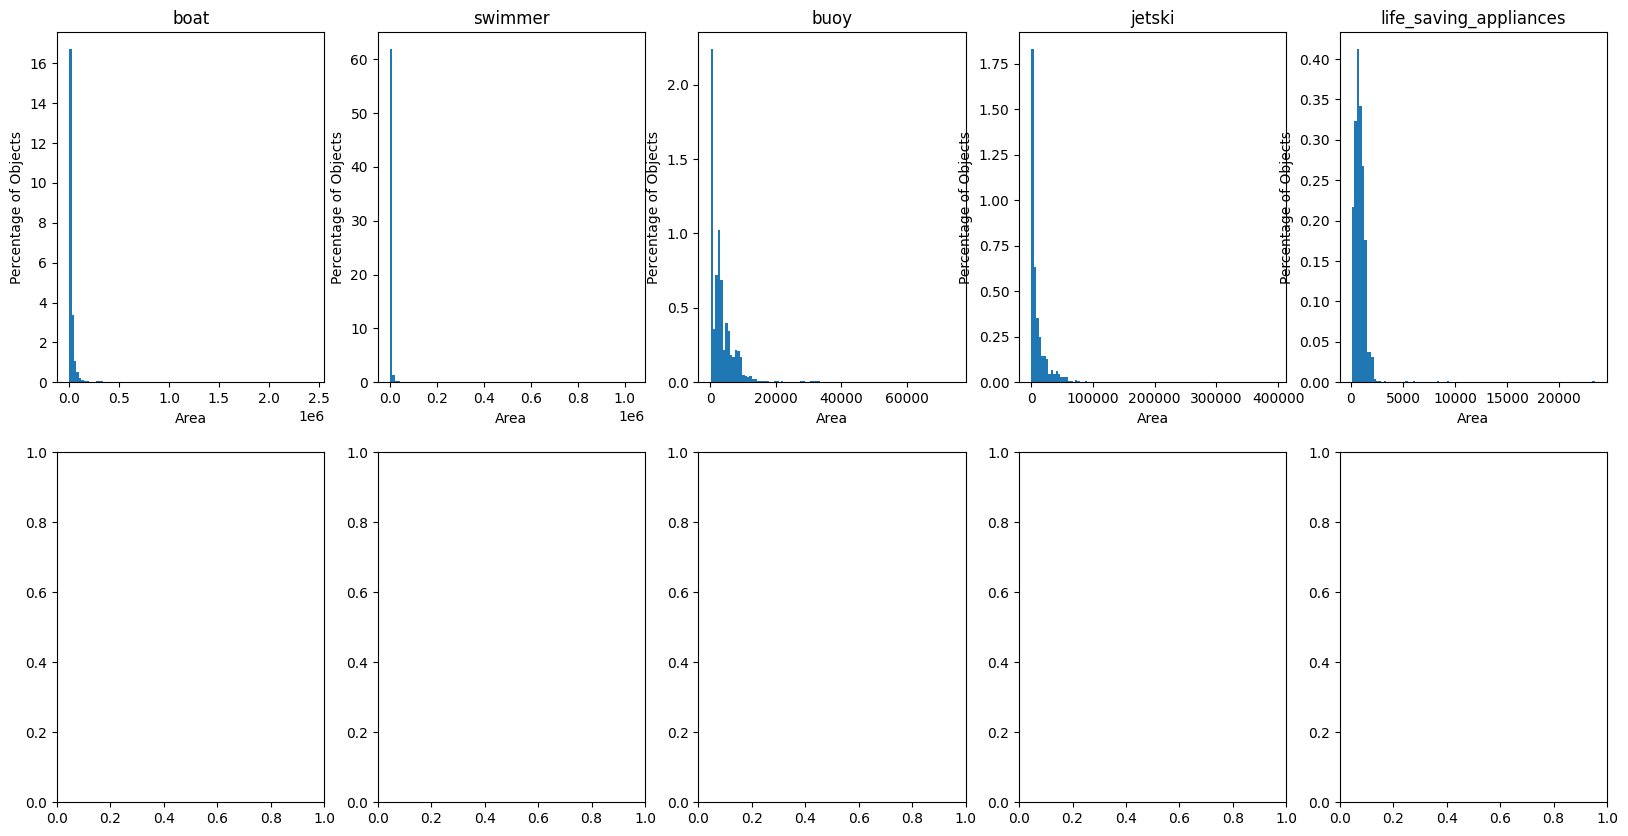

In [36]:
# visualize the number of objects per class. also provide the size distribution per class
class_counts = {}
class_sizes = {}
for coco in all_coco:
    for ann in coco["annotations"]:
        class_name = coco["categories"][ann["category_id"]]["name"]
        if class_name not in class_counts:
            class_counts[class_name] = 0
            class_sizes[class_name] = []
        class_counts[class_name] += 1
        class_sizes[class_name].append(compute_area(ann["bbox"]))
        
print(class_counts)
print("total number of annotations: ", sum(class_counts.values()))

# rename "life_saving_appliances" to "life_saving"
class_counts["life_saving"] = class_counts.pop("life_saving_appliances")

import matplotlib.pyplot as plt
import numpy as np
# add labels to x and y axis
plt.xlabel("Object Class")
plt.ylabel("Number of Annotations")
# create a bar chart
plt.bar(class_counts.keys(), class_counts.values())
# display the plot
plt.show()

# Compute the total number of objects per class
total_objects_per_class = sum(c for c in class_counts.values())

# Compute the histogram of object sizes per class
hist = {}
for class_name, sizes in class_sizes.items():
    hist[class_name], bins = np.histogram(sizes, bins=100)
    
# Convert counts to percentages
hist_percentage = {}
for class_name, h in hist.items():
    hist_percentage[class_name] = h / total_objects_per_class * 100
    
# Visualize the histogram of object sizes per class
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, (class_name, h) in enumerate(hist_percentage.items()):
    ax = axs[i // 5, i % 5]
    ax.hist(class_sizes[class_name], bins=100, weights=np.ones(len(class_sizes[class_name])) / total_objects_per_class * 100)
    ax.set_title(class_name)
    ax.set_xlabel("Area")
    ax.set_ylabel("Percentage of Objects")
    
plt.show()


In [37]:
all_meta_keys = set()
without_meta = 0
total = 0
for coco in all_coco:
    total += len(coco["images"])
    for img in coco["images"]:
        meta = img["meta"]
        if not meta:
            without_meta += 1
            continue
        all_meta_keys.update(meta.keys())

print("total", total)
print("without_meta", without_meta)
print(all_meta_keys)

all_keys_coco_images = set()
source_keys = set()
# print all keys of image
for coco in all_coco:
    for img in coco["images"]:
        all_keys_coco_images.update(img.keys())
        if "source" in img:
            source_keys.update(img["source"])
print(all_keys_coco_images)
print(source_keys)

total 14227
without_meta 4230
{'speed(m/s)', 'longitude', 'gps_latitude', 'gps_longitude', 'yspeed(m/s)', 'image_name', 'zspeed', 'gimbal_pitch(degrees)', 'gimbal_pitch', 'date_time', 'gps_latitude_ref', 'gimbal_heading(degrees)', 'latitude', 'datetime(utc)', 'height_above_takeoff(meter)', 'yspeed', 'gps_longitude_ref', 'xspeed(m/s)', 'altitude', 'compass_heading(degrees)', 'zspeed(m/s)', 'speed', 'xspeed'}
{'id', 'frame', 'width', 'meta', 'source', 'file_name', 'date_time', 'height'}
{'video', '2', 't', 'r', '1', 'frame_no', 'i', 'drone', 'n', 'y', 'm', 'a', 'image_name', '0', 'c', 'v', 'folder_name'}


Number of annotations with angle > 90:  0
{'-15-0': 18, '0-15': 4911, '15-30': 14845, '30-45': 16275, '45-60': 4236, '60-75': 3179, '75-90': 1554, '90-105': 1731}
total number of annotations:  46749


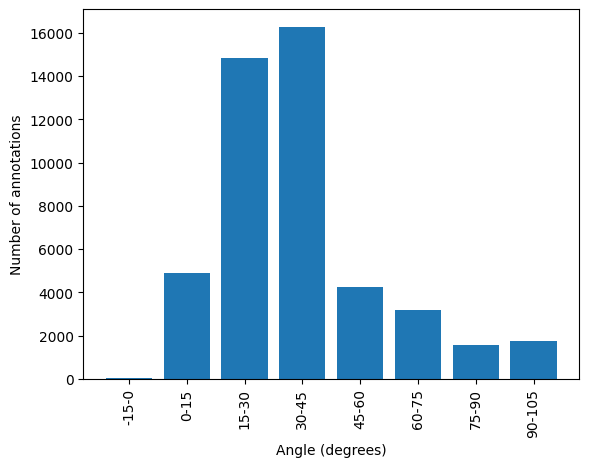

In [38]:
# angle count

angle_counts = {}
count_bigger_90 = 0
bin_size = 15
for coco in all_coco:
    filtered_images = [img for img in coco["images"] if "meta" in img and img["meta"] is not None]
    img_angle = {img["id"]: (img["meta"]["gimbal_pitch(degrees)"] if "gimbal_pitch(degrees)" in img["meta"] else img["meta"]["gimbal_pitch"]) for img in filtered_images }

    for ann in coco["annotations"]:
        if ann["image_id"] not in img_angle:
            continue
        angle = img_angle[ann["image_id"]]
        if angle > 90:
            count_bigger_90 += 1
        angle_bin = angle // bin_size
        if angle_bin not in angle_counts:
            angle_counts[angle_bin] = 0
        angle_counts[angle_bin] += 1

print("Number of annotations with angle > 90: ", count_bigger_90)
angle_counts = dict(sorted(angle_counts.items())) 
angle_counts = {f"{int(k)*bin_size}-{int(k+1)*bin_size}": v for k, v in angle_counts.items()}
print(angle_counts)
print("total number of annotations: ", sum(angle_counts.values()))

# create a visualization of the altitude counts
import matplotlib.pyplot as plt
# add labels for the axis
plt.xlabel("Angle (degrees)")
plt.ylabel("Number of annotations")
plt.bar(angle_counts.keys(), angle_counts.values())
plt.xticks(rotation=90)
plt.show()

{'0-25': 10289, '25-50': 23359, '50-75': 9799, '75-100': 1933, '100-125': 437, '125-150': 179, '150-175': 205, '175-200': 54, '225-250': 356, '250-275': 138}
total number of annotations:  46749


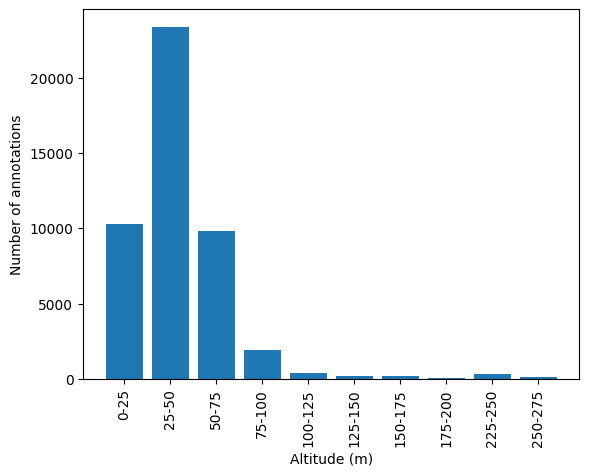

In [39]:
# objects per altitudes in bins of 1000

altitude_counts = {}
altitude_keys = ["altitude", "height_above_takeoff(meter)"]
for coco in all_coco:
    filtered_images = [img for img in coco["images"] if "meta" in img and img["meta"] is not None]
    img_alt = {img["id"]: (img["meta"][altitude_keys[0]] if altitude_keys[0] in img["meta"] else img["meta"][altitude_keys[1]]) for img in filtered_images }

    for ann in coco["annotations"]:
        if ann["image_id"] not in img_alt:
            continue
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 25
        if altitude_bin not in altitude_counts:
            altitude_counts[altitude_bin] = 0
        altitude_counts[altitude_bin] += 1
       
altitude_counts = dict(sorted(altitude_counts.items())) 
altitude_counts = {f"{int(k)*25}-{int(k+1)*25}": v for k, v in altitude_counts.items()}
print(altitude_counts)
print("total number of annotations: ", sum(altitude_counts.values()))

# create a visualization of the altitude counts
import matplotlib.pyplot as plt
# add labels for the axis
plt.xlabel("Altitude (m)")
plt.ylabel("Number of annotations")
plt.bar(altitude_counts.keys(), altitude_counts.values())
plt.xticks(rotation=90)
plt.show()

{'0-25': {'medium': 5377, 'large': 2801, 'small': 1032, 'tiny': 1079}, '25-50': {'large': 5291, 'medium': 11962, 'tiny': 1175, 'small': 4931}, '50-75': {'large': 1024, 'medium': 3775, 'small': 3114, 'tiny': 1886}, '75-100': {'large': 363, 'medium': 931, 'small': 513, 'tiny': 126}, '100-125': {'medium': 166, 'large': 41, 'small': 136, 'tiny': 94}, '125-150': {'medium': 49, 'small': 38, 'tiny': 91, 'large': 1}, '150-175': {'medium': 35, 'tiny': 153, 'small': 17}, '175-200': {'tiny': 39, 'medium': 7, 'small': 8}, '225-250': {'small': 251, 'tiny': 105}, '250-275': {'tiny': 46, 'small': 92}}
{'0-25': {'tiny': 0.10486927786956944, 'small': 0.10030129264262805, 'medium': 0.5225969481971037, 'large': 0.2722324812906988}, '25-50': {'tiny': 0.05030181086519115, 'small': 0.21109636542660218, 'medium': 0.5120938396335459, 'large': 0.22650798407466072}, '50-75': {'tiny': 0.19246861924686193, 'small': 0.31778752933972854, 'medium': 0.3852433921828758, 'large': 0.10450045923053373}, '75-100': {'tiny'

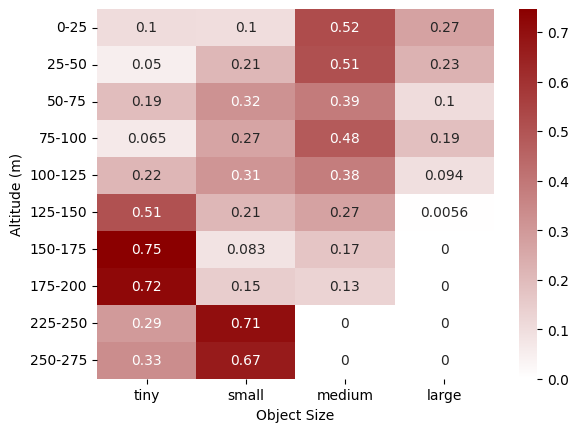

In [40]:
# object sizes per altitude
# heatmap of object sizes (tiny, small, medium, large) per altitude bin of 100m

altitude_size_counts = {}
for coco in all_coco:
    filtered_images = [img for img in coco["images"] if "meta" in img and img["meta"] is not None]
    img_alt = {img["id"]: (img["meta"][altitude_keys[0]] if altitude_keys[0] in img["meta"] else img["meta"][altitude_keys[1]]) for img in filtered_images }

    for ann in coco["annotations"]:
        if ann["image_id"] not in img_alt:
            continue
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 25
        size_name = get_size_name(compute_area(ann["bbox"]))
        if altitude_bin not in altitude_size_counts:
            altitude_size_counts[altitude_bin] = {}
        if size_name not in altitude_size_counts[altitude_bin]:
            altitude_size_counts[altitude_bin][size_name] = 0
        altitude_size_counts[altitude_bin][size_name] += 1

altitude_size_counts = dict(sorted(altitude_size_counts.items()))
altitude_size_counts = {f"{int(k)*25}-{int(k+1)*25}": v for k, v in altitude_size_counts.items()}
print(altitude_size_counts)

# ensure that each altitude_size_count has the same keys
for k in altitude_size_counts.keys():
    for size in ["tiny", "small", "medium", "large"]:
        if size not in altitude_size_counts[k]:
            altitude_size_counts[k][size] = 0

altitude_size_counts_percent = {}
for k, v in altitude_size_counts.items():
    total = sum(v.values())
    altitude_size_counts_percent[k] = {size: count/total for size, count in v.items()}

# sort tiny, small, medium, large in this order
altitude_size_counts_percent = {k: {size: altitude_size_counts_percent[k][size] for size in ["tiny", "small", "medium", "large"]} for k in altitude_size_counts_percent.keys()}
print(altitude_size_counts_percent)

# visual heatmap from these values
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(altitude_size_counts_percent).T
# the larger the number, the more red the color of the field
from matplotlib.colors import LinearSegmentedColormap



cmap = LinearSegmentedColormap.from_list('custom_red', ['white', 'darkred'], N=256)

sns.heatmap(df, annot=True, cmap=cmap)
plt.xlabel("Object Size")
plt.ylabel("Altitude (m)")
plt.show()

{'train': {'medium': 26746, 'large': 9243, 'small': 13727, 'tiny': 8044}, 'validate': {'large': 1868, 'medium': 4796, 'small': 2323, 'tiny': 643}, 'test': {}}
{'train': {'medium': 0.4630540166204986, 'large': 0.16002423822714681, 'small': 0.23765581717451523, 'tiny': 0.13926592797783935}, 'validate': {'large': 0.19397715472481827, 'medium': 0.4980269989615784, 'small': 0.24122533748701974, 'tiny': 0.0667705088265836}, 'test': {}}
{'train': {'-100-0': 38666, '0-100': 773, '100-200': 428}, 'validate': {'-100-0': 6714, '0-100': 102, '100-200': 66}, 'test': {}}
{'train': {'-100-0': 0.9698748338224596, '0-100': 0.019389469987709133, '100-200': 0.010735696189831188}, 'validate': {'-100-0': 0.9755884917175239, '0-100': 0.014821272885789015, '100-200': 0.00959023539668701}, 'test': {}}


<Axes: >

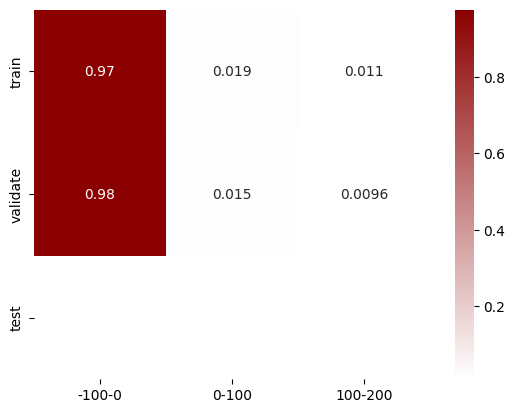

In [41]:
# distribution of object sizes  in trian/val/test seperately

size_counts = {}
for coco, ds_name in zip(all_coco, ds_names):
    size_counts[ds_name] = {}
    for ann in coco["annotations"]:
        size_name = get_size_name(compute_area(ann["bbox"]))
        if size_name not in size_counts[ds_name]:
            size_counts[ds_name][size_name] = 0
        size_counts[ds_name][size_name] += 1

print(size_counts)
size_counts_percent = {}
for k, v in size_counts.items():
    total = sum(v.values())
    size_counts_percent[k] = {size: count/total for size, count in v.items()}
        
print(size_counts_percent)

altitude_counts = {}
for coco, ds_name in zip(all_coco, ds_names):
    altitude_counts[ds_name] = {}
    filtered_images = [img for img in coco["images"] if "meta" in img and img["meta"] is not None]
    img_alt = {img["id"]: (img["meta"][altitude_keys[0]] if altitude_keys[0] in img["meta"] else img["meta"][altitude_keys[1]]) for img in filtered_images }

    for ann in coco["annotations"]:
        if ann["image_id"] not in img_alt:
            continue
        altitude = img_alt[ann["image_id"]]
        altitude_bin = altitude // 100
        if altitude_bin not in altitude_counts[ds_name]:
            altitude_counts[ds_name][altitude_bin] = 0
        altitude_counts[ds_name][altitude_bin] += 1

altitude_counts = {k: dict(sorted(v.items())) for k, v in altitude_counts.items()}
altitude_counts = {k: {f"{int(k-1)*100}-{int(k)*100}": v for k, v in altitude_counts[k].items()} for k in altitude_counts.keys()}
print(altitude_counts)
altitude_counts_percent = {}
for k, v in altitude_counts.items():
    total = sum(v.values())
    altitude_counts_percent[k] = {size: count/total for size, count in v.items()}
print(altitude_counts_percent)

# visualize altitude and size percentages per set
df = pd.DataFrame(altitude_counts_percent).T
sns.heatmap(df, annot=True, cmap=cmap)




<Axes: >

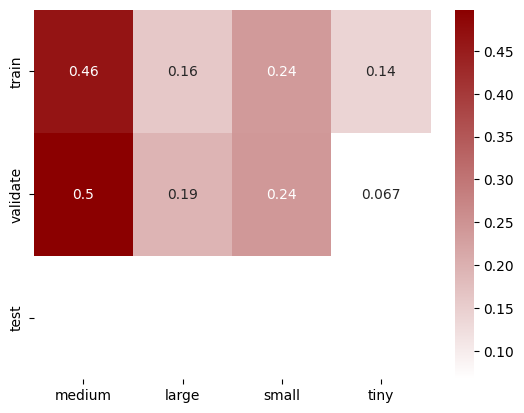

In [42]:
df2 = pd.DataFrame(size_counts_percent).T
sns.heatmap(df2, annot=True, cmap=cmap)

In [43]:
# image count in each set
image_counts = {ds_name: len(coco["images"]) for coco, ds_name in zip(all_coco, ds_names)}
print(image_counts)

# image counts with and without objects per set
image_counts_with_objects = {ds_name: len(set([ann["image_id"] for ann in coco["annotations"]])) for coco, ds_name in zip(all_coco, ds_names)}
print(image_counts_with_objects)
image_counts_without_objects = {ds_name: image_counts[ds_name] - image_counts_with_objects[ds_name] for ds_name in image_counts.keys()}
print(image_counts_without_objects)

# Object counts per set
object_counts = {ds_name: len(coco["annotations"]) for coco, ds_name in zip(all_coco, ds_names)}
print(object_counts)

{'train': 8930, 'validate': 1547, 'test': 3750}
{'train': 8930, 'validate': 1547, 'test': 0}
{'train': 0, 'validate': 0, 'test': 3750}
{'train': 57760, 'validate': 9630, 'test': 0}


{'2160x3840': 8941, '1080x1920': 2625, '3632x5456': 1956, '933x1228': 705}


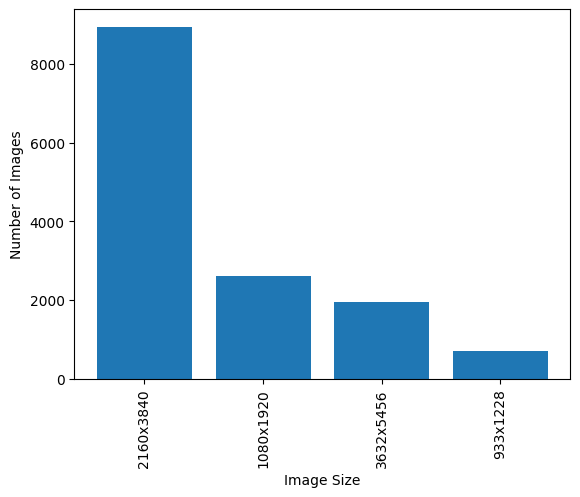

In [44]:
# create distribution plot of image sizes

# they should be sorted by size and the key should contain height and width. If height and width are inverse the same key should be used

image_sizes = {}
for coco, ds_name in zip(all_coco, ds_names):
    for img in coco["images"]:
        h = min(img["height"], img["width"])
        w = max(img["height"], img["width"])
        key = f"{h}x{w}"
        if key not in image_sizes:
            image_sizes[key] = 0
        image_sizes[key] += 1

#sort the keys by occurance
image_sizes = dict(sorted(image_sizes.items(), key=lambda item: item[1], reverse=True))

# combine all keys where height is within 10px of another key
keys = list(image_sizes.keys())
for key in keys:
    h, w = key.split("x")
    h = int(h)
    w = int(w)
    for other_key in keys:
        if key == other_key:
            continue
        other_h, other_w = other_key.split("x")
        other_h = int(other_h)
        other_w = int(other_w)
        if abs(h - other_h) < 10 or abs(w - other_w) < 10:
            image_sizes[key] += image_sizes[other_key]
            del image_sizes[other_key]
            keys.remove(other_key)
            
keys = list(image_sizes.keys())
for key in keys:
    h, w = key.split("x")
    h = int(h)
    w = int(w)
    for other_key in keys:
        if key == other_key:
            continue
        other_h, other_w = other_key.split("x")
        other_h = int(other_h)
        other_w = int(other_w)
        if abs(h - other_h) < 10 or abs(w - other_w) < 10:
            image_sizes[key] += image_sizes[other_key]
            del image_sizes[other_key]
            keys.remove(other_key)
            

print(image_sizes)

# visualize the image sizes
import matplotlib.pyplot as plt
# add labels for the axis
plt.xlabel("Image Size")
plt.ylabel("Number of Images")
plt.bar(image_sizes.keys(), image_sizes.values())
plt.xticks(rotation=90)
plt.show()
